# Trial Class Hacktiv8: Prediksi SMS Spam Bahasa Indonesia

## Bagian 1: Model Bag of Words

In [1]:
# contoh teks untuk training model
corpus = ["Saya sedang belajar Data Science",
          "Python merupakan salah satu tools Data Science",
          "Machine learning adalah salah satu cabang data science",
          "Scikit learn membuat machine learning menjadi lebih mudah",
          "Banyak data data tersebar di internet"]

Dari [dokumentasi scikit-learn](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect **numerical feature vectors with a fixed size** rather than the **raw text documents with variable length**.

Kita akan menggunakan [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) untuk mengubah "teks menjadi matriks":

In [2]:
# inisiasi model bag of words
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [3]:
# pelajari vocab pada corpus
vect.fit(corpus)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [4]:
# lihat vocab
vect.get_feature_names()

['adalah',
 'banyak',
 'belajar',
 'cabang',
 'data',
 'di',
 'internet',
 'learn',
 'learning',
 'lebih',
 'machine',
 'membuat',
 'menjadi',
 'merupakan',
 'mudah',
 'python',
 'salah',
 'satu',
 'saya',
 'science',
 'scikit',
 'sedang',
 'tersebar',
 'tools']

In [5]:
# transformasikan list corpus menjadi matriks fitur
corpus_mat = vect.transform(corpus)
corpus_mat

<5x24 sparse matrix of type '<class 'numpy.int64'>'
	with 33 stored elements in Compressed Sparse Row format>

In [6]:
# ubah sparse matriks menjadi dense matriks
corpus_mat.toarray()

array([[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 1],
       [1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0],
       [0, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0]])

In [8]:
# lihat arti dari fitur menggunakan pandas dataframe
import pandas as pd
pd.DataFrame(corpus_mat.toarray(), columns=vect.get_feature_names())

,adalah,banyak,belajar,cabang,data,di,internet,learn,learning,lebih,machine,membuat,menjadi,merupakan,mudah,python,salah,satu,saya,science,scikit,sedang,tersebar,tools
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,1
2,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0
4,0,1,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Dari [dokumentasi scikit-learn](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> In this scheme, features and samples are defined as follows:

> - Each individual token occurrence frequency (normalized or not) is treated as a **feature**.
> - The vector of all the token frequencies for a given document is considered a multivariate **sample**.

> A **corpus of documents** can thus be represented by a matrix with **one row per document** and **one column per token** (e.g. word) occurring in the corpus.

> We call **vectorization** the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the **Bag of Words** or "Bag of n-grams" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

Dari [dokumentasi scikit-learn](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> As most documents will typically use a very small subset of the words used in the corpus, the resulting matrix will have **many feature values that are zeros** (typically more than 99% of them).

> For instance, a collection of 10,000 short text documents (such as emails) will use a vocabulary with a size in the order of 100,000 unique words in total while each document will use 100 to 1000 unique words individually.

> In order to be able to **store such a matrix in memory** but also to **speed up operations**, implementations will typically use a **sparse representation** such as the implementations available in the `scipy.sparse` package.

In [9]:
# Contoh tes model
new_sent = ["Saya belajar di kelas trial data science hacktiv8"]

Untuk **membuat prediksi**, observasi harus memiliki **fitur yang sama seperti data training**, dari jumlah dan maknanya.

In [10]:
# transformasi teks baru kedalam matriks
new_sent_mat = vect.transform(new_sent)

In [12]:
# lihat menggunakan pandas dataframe
pd.DataFrame(new_sent_mat.toarray(), columns=vect.get_feature_names())

,adalah,banyak,belajar,cabang,data,di,internet,learn,learning,lebih,machine,membuat,menjadi,merupakan,mudah,python,salah,satu,saya,science,scikit,sedang,tersebar,tools
0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


**Ringkasan:**

- `vect.fit(train)` **memelajari vocabulary** dari data training
- `vect.transform(train)` menggunakan **vocabulary yang sudah dibuat** untuk membangun matriks fitur data training
- `vect.transform(test)` menggunakan **vocabulary yang sudah dibuat** untuk membangun matriks fitur data test

## Bagian 2: Membuka Data

In [13]:
# Baca data
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/afifai/hacktiv8-trial-class-spamdetector/main/data/dataset_sms_spam%20_v1.csv")
df.head()

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


In [15]:
df.label = df.label.map({0:"SMS Biasa", 1:"SMS Penipuan", 2:"SMS Operator"})

In [16]:
df.head()

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,SMS Operator
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,SMS Operator
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",SMS Operator
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",SMS Operator
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,SMS Operator


In [17]:
# lihat ukuran
df.shape

(1143, 2)

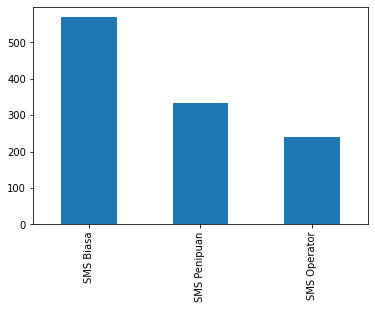

In [19]:
# lihat distribusi kelas
import matplotlib.pyplot as plt
df.label.value_counts().plot(kind='bar');

In [20]:
# Split data menjadi data train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Teks, df.label, test_size=0.2)

In [23]:
X_test.shape

(229,)

## Bagian 4: Vektorisasi

In [24]:
# Inisiasi vectorizer 
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [26]:
# Pelajari vocabulary dan ubah data train menjadi matriks
vect.fit(X_train)
X_train_vec = vect.transform(X_train)

In [27]:
# lihat vektor fitur
X_train_vec

<914x4314 sparse matrix of type '<class 'numpy.int64'>'
	with 15252 stored elements in Compressed Sparse Row format>

In [28]:
# lakukan hal yang sama dengan data testing
X_test_vec = vect.transform(X_test)

## Bagian 5: Klasifikasi

Misal kita gunakan [multinomial Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html):

> The multinomial Naive Bayes classifier is suitable for classification with **discrete features** (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [29]:
# import
from sklearn.naive_bayes import MultinomialNB

In [30]:
# train dengan melihat waktu eksekusi
nb = MultinomialNB()
%timeit nb.fit(X_train_vec, y_train)

100 loops, best of 5: 3.09 ms per loop


In [31]:
# buat prediksi
y_pred = nb.predict(X_test_vec)

In [35]:
# tampilkan hasil evaluasi model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   SMS Biasa       1.00      0.98      0.99       108
SMS Operator       0.92      0.98      0.95        59
SMS Penipuan       0.97      0.94      0.95        62

    accuracy                           0.97       229
   macro avg       0.96      0.97      0.96       229
weighted avg       0.97      0.97      0.97       229



## Bagian 6: Inference

In [40]:
# coba sms baru
new_sms = ["Hai bro, apa kabar ?",
           "Dapatkan kuota harian hanya 1000 rupiah per gb, kunjungi aplikasi mygsm",
           "pesugihan halal, lipatgandakan uang anda sekarang bersama ki ....",
           "besok futsal ya"]

In [41]:
new_sms_vect = vect.transform(new_sms)

In [42]:
hasil = nb.predict(new_sms_vect)

In [43]:
print(hasil)

['SMS Biasa' 'SMS Operator' 'SMS Penipuan' 'SMS Biasa']
